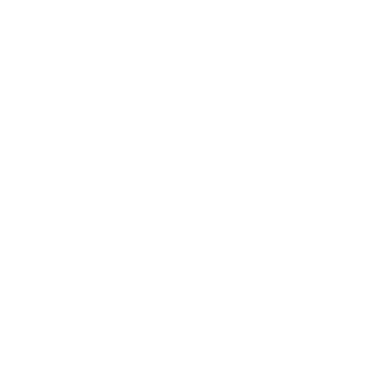

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# obrazu 20x20 bialy
new_image = Image.new('RGB', (10, 10), color='white')
new_image.save('original_image.png')

plt.imshow(new_image)
plt.axis('off')
plt.show()

In [54]:
from PIL import Image

# litera na 9 bitowe ascii
def letter_to_bits(letter):
    ascii_value = ord(letter)
    binary_value = bin(ascii_value)[2:].zfill(9)
    return binary_value

# alg najmniej znbaczacego bitu
def hide_word(image_path, word):
    image = Image.open(image_path)
    width, height = image.size
    pixels = list(image.getdata())

    word_index = 0
    for i in range(0, width * height, 3):
        if word_index < len(word):
            letter = word[word_index]
            binary_letter = letter_to_bits(letter)

            for j in range(3):
                pixel_index = i + j
                if pixel_index < len(pixels):
                    r, g, b = pixels[pixel_index]
                    r = (r & 0b11111110) | int(binary_letter[j * 3])  #  R
                    g = (g & 0b11111110) | int(binary_letter[j * 3 + 1])  #  G
                    b = (b & 0b11111110) | int(binary_letter[j * 3 + 2])  #B
                    pixels[pixel_index] = (r, g, b)
            word_index += 1

    modified_image = Image.new(image.mode, image.size)
    modified_image.putdata(pixels)
    modified_image.save("modified_image.png")


In [55]:
word_to_hide = "szkola"
hide_word("original_image.png", word_to_hide)

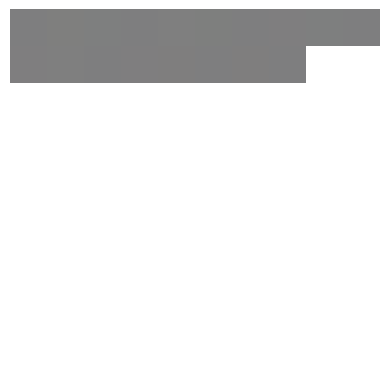

In [56]:
modified_img = mpimg.imread('modified_image.png')
plt.imshow(modified_img)
plt.axis('off')
plt.show()

In [52]:
from PIL import Image

image = Image.open('modified_image.png')

# macierz pikseli
print("*****macierz pikseli zdjecia*****")
pixels = list(image.getdata())
for i in range(image.height):
    for j in range(image.width):
        pixel_index = i * image.width + j
        r, g, b = pixels[pixel_index]
        print(f"({r}, {g}, {b})", end=" ")
    print()

print("*****kazda litera slowa na 9 bitach *****")
# printowanie slowa bin
for letter in word_to_hide:
  print(letter_to_bits(letter))

*****macierz pikseli zdjecia*****
(254, 254, 255) (255, 255, 254) (254, 255, 255) (254, 254, 255) (255, 255, 255) (254, 255, 254) (254, 254, 255) (255, 254, 255) (254, 255, 255) (254, 254, 255) 
(255, 254, 255) (255, 255, 255) (254, 254, 255) (255, 254, 255) (255, 254, 254) (254, 254, 255) (255, 254, 254) (254, 254, 255) (255, 255, 255) (255, 255, 255) 
(255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) 
(255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) 
(255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) 
(255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) (255, 255, 255) 


In [53]:
#dekodowanie
def decode_message(image):
    pixels = list(image.getdata())

    decoded_message = ""
    current_byte = 0
    bit_count = 0

    for pixel in pixels:
        for color in pixel:
            # czytamy lsb
            lsb = color & 1

            current_byte = (current_byte << 1) | lsb
            bit_count += 1

            #czytamy 9 bitow bo tyle ma 1 litera
            if bit_count == 9:
                if current_byte == 0:

                    return decoded_message
                else:
                    # to bylo ascii
                    decoded_message += chr(current_byte)
                    current_byte = 0
                    bit_count = 0

    return decoded_message


image = Image.open('modified_image.png')
decoded_message = decode_message(image)
print("zdekodowana: ", decoded_message)


zdekodowana:  szkolaǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿǿ
